## Exploratory Data Analysis - Locales en Venta en CABA

#### Importamos librerías relevantes
Pandas para manejo de data, numpy para operaciones matemáticas, matplolib y seaborn para graficar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Locales en venta en CABA - 2020
##### Pre-procesamiento
El objetivo de este trabajo es predecir el precio de un local en la Ciudad de Buenos Aires a partir de la data disponible en el portal de información del Gobierno de la Ciudad para el 2020: https://data.buenosaires.gob.ar/dataset/locales-en-venta
Para lograr esto, en primera instancia se analizará este dataset y se lo limpiará en caso de que sea necesario.

Leemos el dataset y lo almacenamos en un dataframe:

In [2]:
df = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/locales-en-venta/locales-en-venta-2020.csv')
print('Hay un total de {} filas en el base de datos.'.format(len(df.index)))
df.head()

Hay un total de 6575 filas en el base de datos.


,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,USDM2,PESOSM2,ANTIG,EN_GALERIA,COTIZ_,TRIMESTRE_,BARRIOS_,COMUNA_
0,"ACUÑA DE FIGUEROA, FRANCISCO 1000",26,87000,5481000,3346,3346,5,SI,63,PRIMER,ALMAGRO,5
1,"ACUÑA DE FIGUEROA, FRANCISCO 400",34,92000,5796000,2706,2706,45,NO,63,PRIMER,ALMAGRO,5
2,"ACUÑA DE FIGUEROA, FRANCISCO 900",60,110000,6930000,1833,1833,0,NO,63,PRIMER,ALMAGRO,5
3,"ACUÑA DE FIGUEROA, FRANCISCO 909",29,60000,3780000,2069,2069,40,NO,63,PRIMER,ALMAGRO,5
4,BELGRANO 3800,334,380000,23940000,1138,1138,65,NO,63,PRIMER,ALMAGRO,5


Pasamos las columnas a minúscula y renombramos algunos nombres.

In [3]:
df.columns = map(str.lower, df.columns)
df.rename(columns={"propiedads": "m2",
                   "en_galeria": "galeria",
                   "cotiz_": "dolar",
                   "barrios_": "barrios",
                   "comuna_": "comuna",
                  },
          inplace=True)
df.head()

,direccion,m2,preciousd,preciopeso,usdm2,pesosm2,antig,galeria,dolar,trimestre_,barrios,comuna
0,"ACUÑA DE FIGUEROA, FRANCISCO 1000",26,87000,5481000,3346,3346,5,SI,63,PRIMER,ALMAGRO,5
1,"ACUÑA DE FIGUEROA, FRANCISCO 400",34,92000,5796000,2706,2706,45,NO,63,PRIMER,ALMAGRO,5
2,"ACUÑA DE FIGUEROA, FRANCISCO 900",60,110000,6930000,1833,1833,0,NO,63,PRIMER,ALMAGRO,5
3,"ACUÑA DE FIGUEROA, FRANCISCO 909",29,60000,3780000,2069,2069,40,NO,63,PRIMER,ALMAGRO,5
4,BELGRANO 3800,334,380000,23940000,1138,1138,65,NO,63,PRIMER,ALMAGRO,5


In [4]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df[['m2', 'preciousd', 'usdm2', 'antig']].describe().loc[['mean', 'std', 'min', 'max']]
# Por si necesitamos resetear el formato
# pd.reset_option('display.float_format')

,m2,preciousd,usdm2,antig
mean,208,438061,2767,11
std,483,778170,1990,20
min,5,6500,316,0
max,16798,20000000,22400,160


Se pueden ver las siguientes columnas:

In [5]:
print(list(df))

['direccion', 'm2', 'preciousd', 'preciopeso', 'usdm2', 'pesosm2', 'antig', 'galeria', 'dolar', 'trimestre_', 'barrios', 'comuna']


Se descartan las columnas irrelevantes:
- direccion
- preciopeso
- pesosm2
- dolar
- trimestre_

In [6]:
df = df.drop(axis=1, columns=['direccion', 'preciopeso', 'pesosm2', 'dolar', 'trimestre_'])
df.head()

,m2,preciousd,usdm2,antig,galeria,barrios,comuna
0,26,87000,3346,5,SI,ALMAGRO,5
1,34,92000,2706,45,NO,ALMAGRO,5
2,60,110000,1833,0,NO,ALMAGRO,5
3,29,60000,2069,40,NO,ALMAGRO,5
4,334,380000,1138,65,NO,ALMAGRO,5


Detectamos si los barrios y la variable galeria tienen datos consistentes y buscamos posibles errores. También buscamos valores 

In [7]:
print('Barrios ordenados: ' + str(sorted(df.barrios.unique())))
print('Valores de galeria: ' + str(df.galeria.unique()))
df.isna().sum()

Barrios ordenados: ['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS ESTE', 'BELGRANO', 'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES', 'CONSTITUCION', 'FLORES NORTE', 'FLORES SUR', 'FLORESTA', 'LINIERS', 'MATADEROS', 'MONTE CASTRO', 'MONTSERRAT', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS', 'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA', 'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO NORTE', 'VILLA DEVOTO SUR', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI', 'VILLA URQUIZA']
Valores de galeria: ['SI' 'NO' nan 'S1']


m2              0
preciousd       0
usdm2           0
antig           0
galeria      4520
barrios         0
comuna          0
dtype: int64

Los barrios no presentan inconvenientes, pero hay una cantidad importante de valores vacíos en galería, y además hay valores en galería iguales a 'S1' en lugar de 'SI'. Asumiremos que los valores vacíos representan locales que no se encuentran en galerías.

In [9]:
df.galeria.fillna('NO', inplace=True)
df.galeria.replace(to_replace='S1', value='SI', inplace=True)
print('Valores de galeria: ' + str(df.galeria.unique()))
show=pd.DataFrame({
    'variable':df.isnull().sum().index,
    'na':df.isna().sum().values,
    'null':df.isnull().sum().values
})
show

Valores de galeria: ['SI' 'NO']


,variable,na,null
0,m2,0,0
1,preciousd,0,0
2,usdm2,0,0
3,antig,0,0
4,galeria,0,0
5,barrios,0,0
6,comuna,0,0


Chequeamos que los valores sean del tipo correcto.

In [10]:
df.dtypes

m2            int64
preciousd     int64
usdm2         int64
antig         int64
galeria      object
barrios      object
comuna        int64
dtype: object

#### Análisis exploratorio
Graficamos precio promedio por barrio

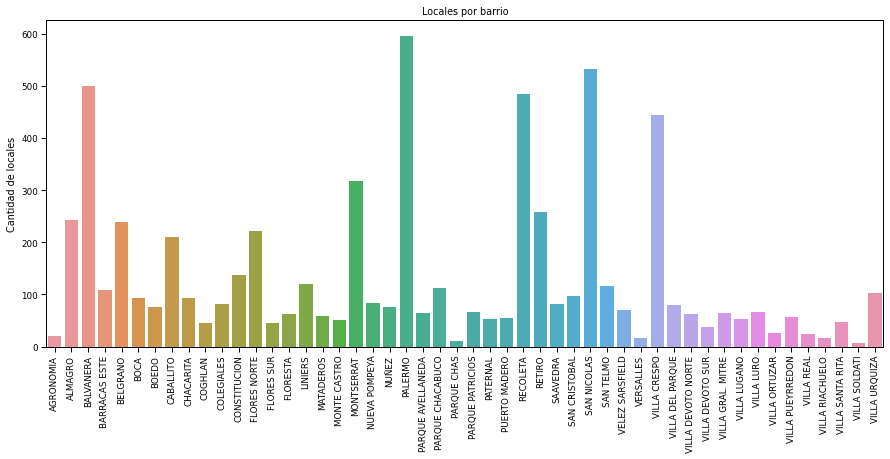

In [27]:
sns.set_context(context="paper", )
plt.figure(figsize=(15,6))
sns.countplot(x=df.barrios.sort_values(ascending = True))
plt.title("Locales por barrio")
plt.ylabel("Cantidad de locales")
plt.xlabel("")
plt.xticks(rotation=90)
plt.show()

, por comuna, ver si aumenta el precio por estar en galeria o no.